In [2]:
!pip install pyglet

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# https://deeplearningcourses.com/c/deep-reinforcement-learning-in-python
# https://www.udemy.com/deep-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import gym
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [4]:
def get_action(s, w):
  return 1 if s.dot(w) > 0 else 0

In [5]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 1000:
    #env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break

  return t

In [6]:
def play_multiple_episodes(env, T, params):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params)

  avg_length = episode_lengths.mean()
  print("avg length:", avg_length)
  return avg_length

In [7]:
def random_search(env):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, 100, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  return episode_lengths, params

avg length: 9.23
avg length: 9.0
avg length: 9.79
avg length: 21.75
avg length: 74.83
avg length: 73.82
avg length: 8.98
avg length: 31.76
avg length: 9.16
avg length: 9.81
avg length: 9.16
avg length: 168.64
avg length: 27.5
avg length: 200.0
avg length: 9.9
avg length: 8.92
avg length: 9.66
avg length: 42.97
avg length: 200.0
avg length: 9.17
avg length: 186.17
avg length: 9.21
avg length: 9.03
avg length: 162.7
avg length: 9.72
avg length: 9.61
avg length: 9.44
avg length: 9.38
avg length: 9.35
avg length: 9.45
avg length: 60.79
avg length: 25.03
avg length: 9.29
avg length: 9.85
avg length: 9.49
avg length: 8.92
avg length: 140.9
avg length: 9.95
avg length: 9.66
avg length: 9.14
avg length: 9.4
avg length: 132.25
avg length: 13.25
avg length: 9.34
avg length: 110.11
avg length: 9.75
avg length: 9.2
avg length: 166.27
avg length: 200.0
avg length: 8.9
avg length: 9.43
avg length: 9.48
avg length: 9.86
avg length: 21.22
avg length: 9.24
avg length: 9.07
avg length: 39.93
avg length:

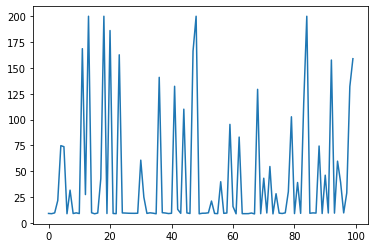

***Final run with final weights***
avg length: 200.0


In [8]:
if __name__ == '__main__':
  env = gym.make('CartPole-v0')
  episode_lengths, params = random_search(env)
  plt.plot(episode_lengths)
  plt.show()

  # play a final set of episodes
  print("***Final run with final weights***")
  play_multiple_episodes(env, 100, params)

In [9]:
#first run
#params array([0.11476263, 0.02170626, 0.86225908, 0.38960605])

In [10]:
#second run
#params array([-0.57293274,  0.77725547,  0.17097457,  0.85951499])

In [11]:
#third run
#params array([0.03672567, 0.27994328, 0.47419654, 0.85324043])

In [12]:
env.observation_space.shape

(4,)

In [14]:
env.action_space

Discrete(2)

In [15]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [18]:
env.observation_space.sample()

array([-9.97385502e-01,  1.61251677e+38,  1.14053406e-01, -1.04396676e+38],
      dtype=float32)